## SVARpy: SVAR-GMM

The core function of the SVARpy package is `SVAR.SVARest(u, estimator)`, which is used to estimate the simultaneous interactions in a non-Gaussian SVAR model. The model is represented by the equation $u_t = B_0 \epsilon_t$, where $u_t$ denotes the reduced form shocks and $\epsilon_t$ represents the structural shocks. The function supports various moment-based estimators for the estimation process.

This file provides an overview of the SVAR-GMM (Generalized Method of Moments) method implemented by Keweloh (2021) in the SVARpy package. The SVAR-GMM estimation can be performed using the following syntax:

```
SVAR.SVARest(u, estimator = 'GMM')
```
 

In [2]:
# Install required packages

# If required pip install SVARpy package
if False:
    !pip install SVARpy

import numpy as np
import matplotlib.pyplot as plt
import SVAR as SVAR
np.random.seed(0)

## Simulate the SVAR

Simulate reduced form shocks $u_t$ from the SVAR

$$
u_t = B_0 ɛ_t
$$

 with $n$ variables, $T$ observations, and structural shocks $ɛ_t$ generated from a uniform distribution.

In [3]:
n = 2  # Number of variables
T = 250  # Number of observations
# Specitfy B0
B0 = np.eye(n)
# Draw structural shocks
eps = np.empty([T, n])
for i in range(n):
    eps[:, i] = np.random.uniform(low=-np.sqrt(3), high=np.sqrt(3), size=T).T
# Generate reduced form shocks u = B eps
u = np.matmul(B0, np.transpose(eps))
u = np.transpose(u)

## Estimator: SVAR-GMM

The SVAR-GMM estimator in Keweloh (2021) aims to find a $B$ matrix, such that the innovations 

$$
e(B)_t := B^{-1} u_t
$$

minimize dependency measures based on the shock's covariance, coskewness, and cokurtosis derived from the assumption of independent structural shocks $\epsilon_t$.

The following table illustrates how the assumption of independent structural shocks $\epsilon_t$ with unit variance can be used to derive the variance, covariance, coskewness, and cokurtosis conditions for the innovations $e(B)_t$ used by the SVAR-GMM estimator.

 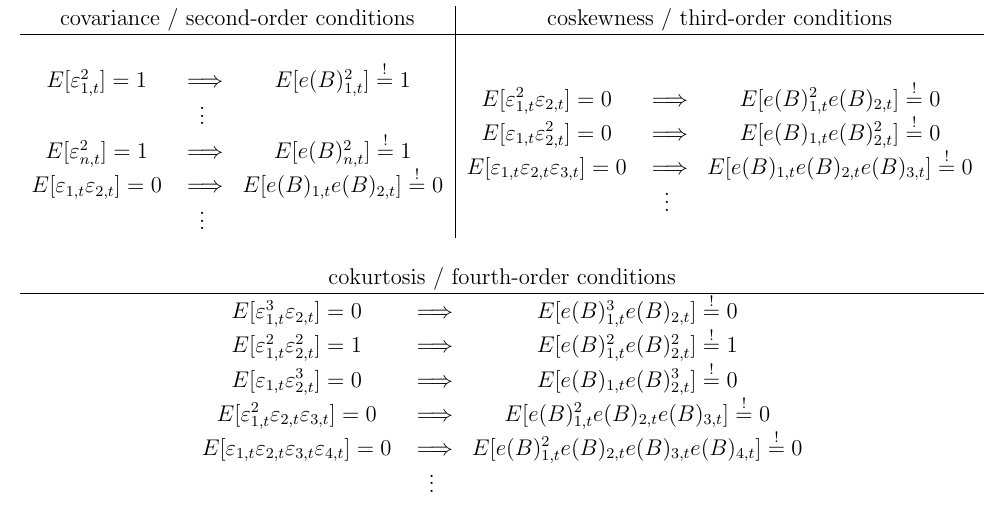

### Run estimation:

The following script performs the estimation of the SVAR model using the SVAR-GMM estimator (`estimator='GMM'`) with the reduced form shocks $u_t$. Additional options can be specified by passing them through the prepOptions dictionary.
 

In [4]:
prepOptions = dict()
SVAR_out = SVAR.SVARest(u, estimator='GMM', prepOptions=prepOptions)

Estimator: GMM (steps=2)
Estimator Wopt/Avar: Uncorrelated/Uncorrelated
| SVAR            | Moments      | Tests             | E[e_1^m] / ... / E[e_n^m]     |
|-----------------|--------------|-------------------|-------------------------------|
| T=250           | #second: 3   | WaldRec=0.95      | m=2: 1.0 / 0.99               |
| n=2             | #third: 2    | WaldRec-pval=0.33 | m=3: -0.08 / 0.11             |
| #restrictions:0 | #fourth: 3   | J=4.37            | m=4: 1.85 / 1.7               |
| #unknowns:4     | ->loss: 0.02 | J-pval=0.36       |                               |
 
|                  |       B(:,1)       |      B(:,2)       |
|------------------|--------------------|-------------------|
|      B(1,:)      |        0.98        |       0.03        |
| (avar/wald/pval) | (0.21/1127.01/0.0) | (0.31/0.95/0.33)  |
|                  |                    |                   |
|      B(2,:)      |       -0.02        |       1.05        |
| (avar/wald/pval) |  (0.22/0.69

### Output:

The output includes the following information:

- Estimator: The estimator used in the `SVAR.SVARest(u, estimator)` function.

- Estimator Wopt/Avar: The options used to calculate the efficient weighting matrix and the asymptotic variance of the estimator.

- T: Sample size.

- n: Number of variables.

- #restrictions: Number of restrictions on the $B_0$ matrix.

- #unknowns: Number of unknown coefficients in the $B_0$ matrix.

- #second: Number of second-order moment conditions (variance and covariance conditions).

- #third: Number of third-order moment conditions (coskewness conditions).

- #fourth: Number of fourth-order moment conditions (cokurtosis conditions).

- loss: GMM loss at $\hat{B}$.

- WaldRec: Wald test statistic for the null hypothesis that the SVAR is recursive.

- WaldRec-pval: P-value corresponding to the Wald test.

- J: Test statistic of the J-Test.

- J-pval: P-value corresponding to the J-Test.

- E[$e_1^m$] with m=2: Variance $E[e_1^2]$ of all estimated shocks.

- E[$e_1^m$] with m=3: Skewness $E[e_1^3]$ of all estimated shocks.

- E[$e_1^m$] with m=4: Kurtosis $E[e_1^4]$ of all estimated shocks.


The output table displays each element of the estimated matrix $\hat{B}$. Restricted values are denoted by "x" and include the following information for each element:

- avar: Estimated asymptotic variance of the corresponding element of the matrix $\hat{B}$.

- wald: Wald test statistic for the null hypothesis that the corresponding element of the matrix $B_0$ is zero.

- pval: P-value corresponding to the Wald test.

### Options:

This section provides an overview on some available options. 

**One-step SVAR-GMM:**

The one-step SVAR-GMM estimation involves performing GMM estimation with a default weighting matrix in the first step, which is set to the identity matrix by default.

In [14]:
prepOptions = dict()
prepOptions['kstep'] = 1
SVAR_out = SVAR.SVARest(u, estimator='GMM', prepOptions=prepOptions)

Estimator: GMM (steps=1)
Estimator Wopt/Avar: Uncorrelated/Uncorrelated
| SVAR            | Moments      | Tests             | E[e_1^m] / ... / E[e_n^m]     |
|-----------------|--------------|-------------------|-------------------------------|
| T=500           | #second: 3   | WaldRec=0.0       | m=2: 0.99 / 1.0               |
| n=2             | #third: 2    | WaldRec-pval=0.98 | m=3: -0.01 / 0.04             |
| #restrictions:0 | #fourth: 3   | J=3.38            | m=4: 1.78 / 1.79              |
| #unknowns:4     | ->loss: 0.01 | J-pval=0.5        |                               |
 
|                  |       B(:,1)       |       B(:,2)       |
|------------------|--------------------|--------------------|
|      B(1,:)      |        1.02        |        -0.0        |
| (avar/wald/pval) | (0.23/2321.15/0.0) |  (0.39/0.0/0.98)   |
|                  |                    |                    |
|      B(2,:)      |        0.01        |        0.99        |
| (avar/wald/pval) |  (0.3

**Two-step SVAR-GMM:**


The two-step SVAR-GMM estimation involves performing a two-step GMM estimation with the identity matrix weighting matrix in the first step, and the estimated asymptotically efficient weighting matrix in the second step.

In [21]:
prepOptions = dict()
prepOptions['kstep'] = 2
SVAR_out = SVAR.SVARest(u, estimator='GMM', prepOptions=prepOptions)

# Note that prepOptions['kstep'] = 2 is the default option and the following code is equivalent to the above
# prepOptions = dict()
# SVAR_out = SVAR.SVARest(u, estimator='GMM', prepOptions=prepOptions)


Estimator: GMM (steps=2)
Estimator Wopt/Avar: Uncorrelated/Uncorrelated
| SVAR            | Moments      | Tests             | E[e_1^m] / ... / E[e_n^m]     |
|-----------------|--------------|-------------------|-------------------------------|
| T=250           | #second: 3   | WaldRec=0.81      | m=2: 1.0 / 1.01               |
| n=2             | #third: 2    | WaldRec-pval=0.37 | m=3: -0.11 / -0.2             |
| #restrictions:0 | #fourth: 3   | J=10.12           | m=4: 1.78 / 1.85              |
| #unknowns:4     | ->loss: 0.04 | J-pval=0.04       |                               |
 
|                  |      B(:,1)       |       B(:,2)       |
|------------------|-------------------|--------------------|
|      B(1,:)      |       1.01        |       -0.04        |
| (avar/wald/pval) | (0.2/1266.54/0.0) |  (0.49/0.81/0.37)  |
|                  |                   |                    |
|      B(2,:)      |       -0.02       |        0.98        |
| (avar/wald/pval) | (0.46/0.32/

**Two-step SVAR-GMM (weighting and asymptotic variance)**

The following ....

Explain asymptotic variance...

In [23]:
# Use the assumption of serially and mutually  independent shocks to estimate the asymptotic variance (Avarparametric=Independent) 
# and the asymptotically efficent weighting matrix (Wpara=Independent), see Keweloh (2021).
prepOptions = dict()
prepOptions['Wpara'] = 'Independent'
prepOptions['Avarparametric'] = 'Independent'
SVAR_out1 = SVAR.SVARest(u, estimator='GMM', prepOptions=prepOptions)

# Use the assumption of serially independent and mutually uncorrelated shocks to estimate the asymptotic variance (Avarparametric=Uncorrelated) 
# and the asymptotically efficent weighting matrix (Wpara=Uncorrelated), see Keweloh (2021).
prepOptions = dict()
prepOptions['Wpara'] = 'Uncorrelated'
prepOptions['Avarparametric'] = 'Uncorrelated'
SVAR_out1 = SVAR.SVARest(u, estimator='GMM', prepOptions=prepOptions)

# Use the assumption of serially independent and mutually uncorrelated shocks to estimate the asymptotic variance (Avarparametric=Uncorrelated) 
# and the asymptotically efficent weighting matrix (Wpara=Uncorrelated), see Keweloh (2021).
prepOptions = dict()
prepOptions['Wpara'] = 'Uncorrelated_centered'
prepOptions['Avarparametric'] = 'Uncorrelated_centered'
SVAR_out1 = SVAR.SVARest(u, estimator='GMM', prepOptions=prepOptions)

Estimator: GMM (steps=2)
Estimator Wopt/Avar: Independent/Independent
| SVAR            | Moments      | Tests             | E[e_1^m] / ... / E[e_n^m]     |
|-----------------|--------------|-------------------|-------------------------------|
| T=250           | #second: 3   | WaldRec=0.74      | m=2: 0.98 / 0.98              |
| n=2             | #third: 2    | WaldRec-pval=0.39 | m=3: -0.11 / -0.17            |
| #restrictions:0 | #fourth: 3   | J=7.01            | m=4: 1.73 / 1.76              |
| #unknowns:4     | ->loss: 0.03 | J-pval=0.14       |                               |
 
|                  |      B(:,1)      |      B(:,2)      |
|------------------|------------------|------------------|
|      B(1,:)      |       1.01       |      -0.03       |
| (avar/wald/pval) | (0.2/1264.3/0.0) | (0.33/0.74/0.39) |
|                  |                  |                  |
|      B(2,:)      |       0.02       |       0.99       |
| (avar/wald/pval) | (0.34/0.37/0.54) | (0.2/1232.4/

**Two-step SVAR-GMM (restrictions)**

The following code shows how to pass restrictions on the $B_0$ matrix to the estimator.

In [24]:
# Manually pass restrictions on B
restrictions = np.full([n, n], np.nan)
restrictions[0, 1] = 0  # zero restriction on position (0,1)

prepOptions = dict()
prepOptions['restrictions'] = restrictions
SVAR_out = SVAR.SVARest(u, estimator='GMM', prepOptions=prepOptions)

Estimator: GMM (steps=2)
Estimator Wopt/Avar: Uncorrelated/Uncorrelated
| SVAR            | Moments      | Tests            | E[e_1^m] / ... / E[e_n^m]     |
|-----------------|--------------|------------------|-------------------------------|
| T=250           | #second: 3   | WaldRec=0.0      | m=2: 1.0 / 1.01               |
| n=2             | #third: 2    | WaldRec-pval=nan | m=3: -0.1 / -0.2              |
| #restrictions:1 | #fourth: 3   | J=10.78          | m=4: 1.78 / 1.86              |
| #unknowns:3     | ->loss: 0.04 | J-pval=0.06      |                               |
 
|                  |      B(:,1)       |       B(:,2)       |
|------------------|-------------------|--------------------|
|      B(1,:)      |       1.01        |       *0.0*        |
| (avar/wald/pval) | (0.2/1266.47/0.0) |   (nan/nan/nan)    |
|                  |                   |                    |
|      B(2,:)      |       -0.03       |        0.98        |
| (avar/wald/pval) | (0.34/0.87/0.35) 

**Two-step SVAR-GMM (startvalues)**

The following....

## References

Keweloh, Sascha Alexander. "A generalized method of moments estimator for structural vector autoregressions based on higher moments." Journal of Business & Economic Statistics 39.3 (2021): 772-782.

Keweloh, Sascha Alexander. "A feasible approach to incorporate information in higher moments in structural vector autoregressions." (2021b).